In [ ]:
# Importing Required libraries

import gensim 
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
import numpy as np
# imports
import plotly.graph_objs as go
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot
%matplotlib inline


    # Comments
Next we are going do :<br>
>**Collecting the training data from the train.txt file and tokenizing the data.**<br>
**Using NLTK for tokenizing**

In [2]:
file = open("train.txt", "r")
paragraph = file.read()
file.close()
paragraph = paragraph.replace("\n", " ") 
corpus = []
for i in sent_tokenize(paragraph): 
    temp = [] 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
    corpus.append(temp)
stop_words = set(stopwords.words('english'))
corpus=[[w for w in corpus[0] if not w in stop_words]]


*   We have corpus to train the model and now we will train it
*   "sg" parameter is set to "0" that means **CBOW** algorithm will be used to train the model
*   Rest all parameter are set by deafult values

**Next step is to create a MODEL using above data**

In [20]:
model = Word2Vec(corpus,sg=0,min_count=1)

model.wv.save_word2vec_format('model.txt', binary=False)     # Saving model in readable format
model.wv.save_word2vec_format('model.bin')                   # Saving model in binary format

**Plotting all words present in vocabulary using PCA**





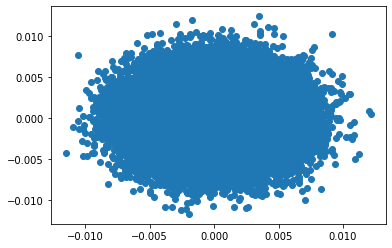

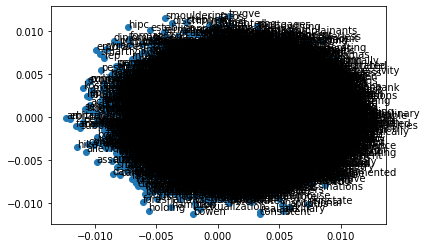

In [21]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

pyplot.show()

pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()




> Now lets see how much similarty is there in words.

 We will test this words **{ place, computer, hero, time , game }** and top 5 similar words to them .







In [22]:

test_words = 'place, computer, hero, time , game'
user_input = [x.strip() for x in test_words.split(',')]
result_word = []

In [23]:

## Defining a function to form the set and grouping the similar words

def append_list(sim_words, words):
    list_of_words = []
    for i in range(len(sim_words)):
        sim_words_list = list(sim_words[i])
        sim_words_list.append(words)
        sim_words_tuple = tuple(sim_words_list)
        list_of_words.append(sim_words_tuple)
    return list_of_words

###### function ends

    
for words in user_input:
    sim_words = model.most_similar(words, topn = 5)
    sim_words = append_list(sim_words, words)
    result_word.extend(sim_words)





> Now lets prepare all the requirements for the Plotting using both **PCA** and **T-SNE**



In [24]:
similar_word = [word[0] for word in result_word]
similar_word.extend(user_input)
labels = [word[2] for word in result_word]
label_dict = dict([(y,x+1) for x,y in enumerate(set(labels))])
color_map = [label_dict[x] for x in labels]



> Lets Define a function for Visulisation plots for **(PCA and t-SNE)**



In [25]:
# Defining function 
def display_pca_or_tsne_scatterplot(who,model, user_input=None, words=None, label=None, color_map=None,perplexity = 0, learning_rate = 0, iteration = 0, topn=5, sample=10):
    word_vectors = np.array([model[w] for w in words])
    
    if who =="pca":
      two_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:2]
    else :
      two_dim = TSNE(n_components = 2, random_state=0, perplexity = perplexity, learning_rate = learning_rate, n_iter = iteration).fit_transform(word_vectors)[:,:2]
    
    data = []
    count = 0
    
    for i in range (len(user_input)):
                trace = go.Scatter(
                    x = two_dim[count:count+topn,0], 
                    y = two_dim[count:count+topn,1],text = words[count:count+topn],name = user_input[i],textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',marker = {'size': 10,'opacity': 0.8,'color': 2})
                data.append(trace)
                count = count+topn
    
    trace_input = go.Scatter(x = two_dim[count:,0],y = two_dim[count:,1],text = words[count:],name = 'input words',textposition = "top center",textfont_size = 20,mode = 'markers+text',
                    marker = {'size': 10,'opacity': 1,'color': 'black'})
    data.append(trace_input)
    plot_figure = go.Figure(data = data)
    plot_figure.show(width=1100,height=600)
    ####### Function ends

# **Plot using PCA**

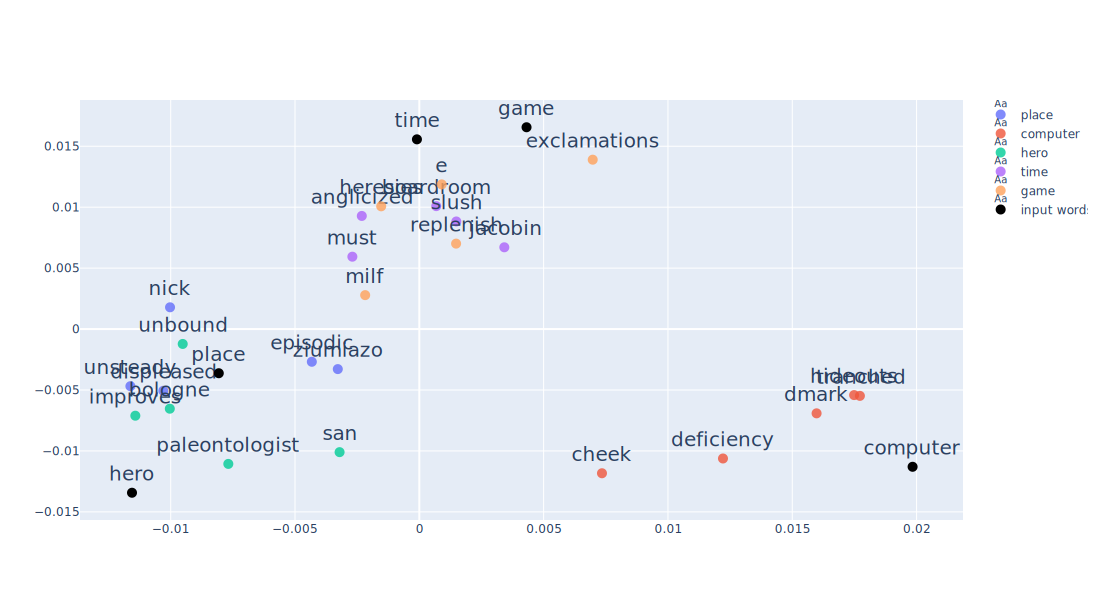

In [26]:
display_pca_or_tsne_scatterplot("pca",model, user_input, similar_word, labels, color_map)

# **Plot using T-SNE**
Using

*   Perplexity = 5
*   Learning_rate = 500
*   Iteration = 1000


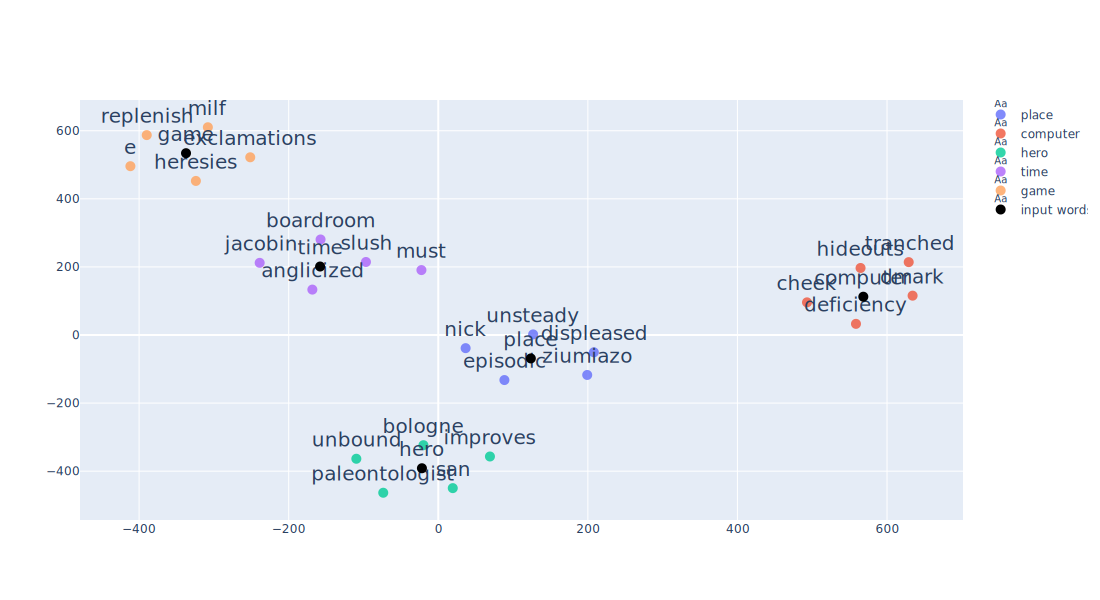

In [27]:
display_pca_or_tsne_scatterplot("tsne",model, user_input, similar_word, labels, color_map,5,500,1000)